In [11]:
import pandas as pd
import altair as alt
from IPython.core.display import display, HTML
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
df= pd.read_csv('data/Otago-Chinese-naturalisations.csv', parse_dates=['ISO date'])

In [4]:
df['Age'] = df['Age'].str.replace(" Yrs", "")
df['Length of residence in NZ'] = df['Length of residence in NZ'].str.replace(" Yrs", "")
df['Age']= pd.to_numeric(df['Age'], errors='coerce')
df['Length of residence in NZ'] = pd.to_numeric(df['Length of residence in NZ'], errors='coerce')
df['Year of arrival'] = df['Year arrived in NZ'].str.replace("Not stated", "")
df['Year of arrival'] = pd.to_numeric(df['Year of arrival'], errors='coerce', downcast='integer')

In [18]:
df.head()

,Name,Chinese name,Chinese signature,Birthplace simplified,Birthdate,Year arrived in NZ,Occupation,Residence city,ISO date,Length of residence in NZ,Age,File no.,Certificate register,Register page no.,Notes,Year of arrival
0,William Ah Wong,Not stated,No,Canton,abt 1862,1874,Gardener,Port Chalmers,1883-07-30,9.00,21,1883/3052,16,97,No other records for 'William Ah Wong'.,1874.0
1,Chun Ah Dunn,Not stated,No,Canton,abt 1859,1873,Gardener,Clyde,1881-04-08,8.00,22,1881/1221,11,28,NaN,1873.0
2,Louis Hoy,雷海,Yes,Canton,abt 1861,1878,Miner,Hyde,1883-07-30,5.00,22,1883/2635,10,30,No other records for 'Louis Hoy'.,1878.0
3,Ah Poo,亞培,Yes,Canton,abt 1861,1880,Gardener,Vincent County – Conroy's Gully,1883-03-19,3.00,22,1883/989,16,25,NaN,1880.0
4,Chin Ben Sing,Not stated,No,Canton,abt 1885,1904,Laundryman,Dunedin,1907-02-07,3.25,22,20/4/456,48,12,Request for copy of letters (burnt in fire) in...,1904.0


## Ages

In [6]:
# Youngest
df['Age'].min()

21

In [7]:
# Oldest
df['Age'].max()

63

In [8]:
# Average
df['Age'].median()

38.0

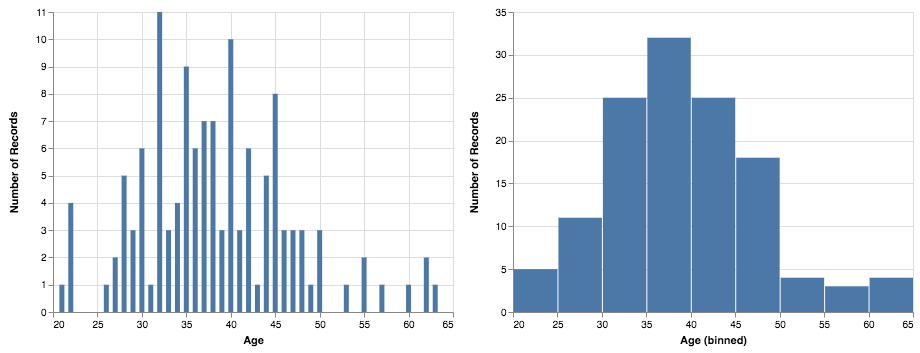

In [13]:
# Make some charts!
chart = alt.Chart(df).mark_bar().encode(
    y='count()',
    tooltip=[alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).interactive()
display(chart.encode(x='Age') | chart.encode(alt.X('Age', bin=True)))

## Year of arrival

In [80]:
# Earliest
int(df['Year of arrival'].min())

1857

In [81]:
# Latest
int(df['Year of arrival'].max())

1904

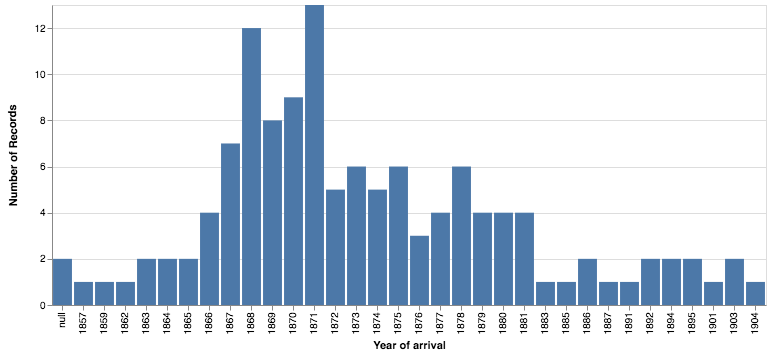

In [15]:
# Make some charts!
chart = alt.Chart(df).mark_bar().encode(
    x='Year of arrival:O',
    y='count()',
    tooltip=['Year of arrival', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).interactive()
display(chart)

## Occupations

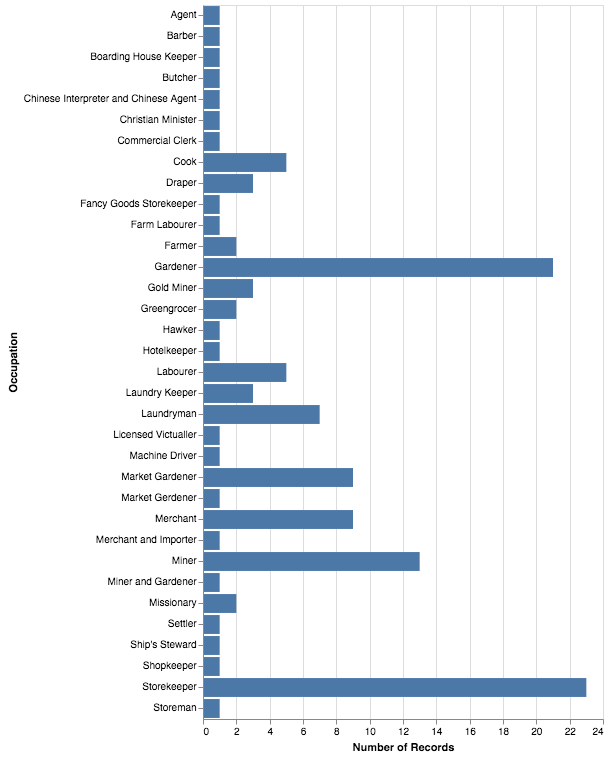

In [16]:
# Make some charts!
chart = alt.Chart(df).mark_bar().encode(
    y='Occupation',
    x='count()',
    tooltip=['Occupation', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).interactive()
display(chart)

## Place of residence

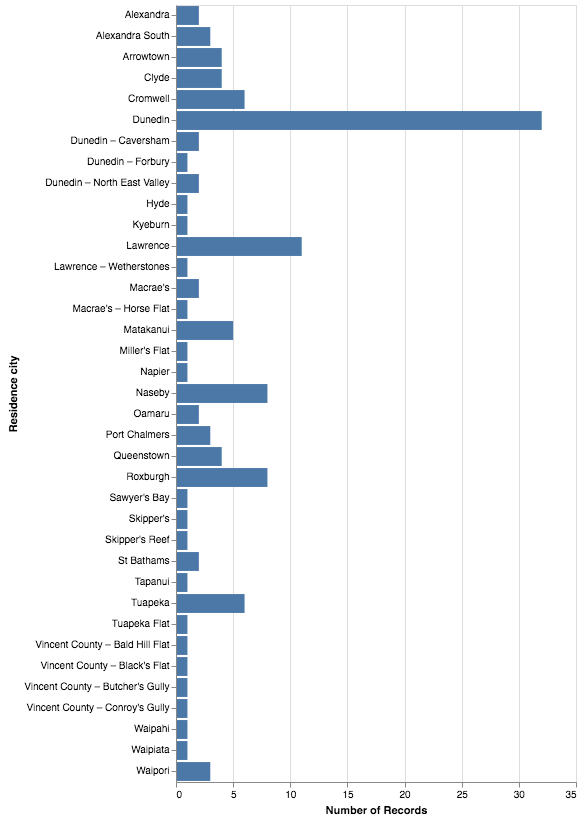

In [17]:
# Make some charts!
chart = alt.Chart(df).mark_bar().encode(
    y='Residence city',
    x='count()',
    tooltip=['Residence city', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).interactive()
display(chart)